## Step 1: Import Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Generate separate Word Clouds for each label
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rashmi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/rashmi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/rashmi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Step 2: Load Dataset

In [3]:
df = pd.read_csv('/Users/rashmi/Downloads/Amazon_Unlocked_Mobile.csv')
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


#### Initial Informations related to Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [5]:
df['Reviews']

0         I feel so LUCKY to have found this used (phone...
1         nice phone, nice up grade from my pantach revu...
2                                              Very pleased
3         It works good but it goes slow sometimes but i...
4         Great phone to replace my lost phone. The only...
                                ...                        
413835                       another great deal great price
413836                                                   Ok
413837          Passes every drop test onto porcelain tile!
413838    I returned it because it did not meet my needs...
413839    Only downside is that apparently Verizon no lo...
Name: Reviews, Length: 413840, dtype: object

In [6]:
for review in df['Reviews'].head(20):
    print(review)

I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!
nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung
Very pleased
It works good but it goes slow sometimes but its a very good phone I love it
Great phone to replace my lost phone. The only thing is the volume up button does not work, but I can still go into settings to adjust. Other than that, it does the job until I am eligible to upgrade my phone again.Thaanks!
I already had a phone with problems... I know it stated it was used, but dang, it did not state 

In [7]:
unique_values = df.nunique()
print(unique_values)

Product Name      4410
Brand Name         384
Price             1754
Rating               5
Reviews         162490
Review Votes       241
dtype: int64


The dataset comprises 413,840 entries distributed across six columns. 
The Product Name and Rating columns have no missing values, 
while others, such as Brand Name (with 65,171 missing entries), Price (5,933 missing entries), 
Reviews (70 missing entries), and Review Votes (12,296 missing entries), contain varying levels of missing data.

## Step 3: Data Pre-processing

In [8]:
df['Reviews'] = df['Reviews'].str.lower()
df['Reviews'].fillna('', inplace=True)
print("\nFirst few rows after preprocessing:")
print(df.head())


First few rows after preprocessing:
                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  i feel so lucky to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       very pleased           0.0  
3       4  it works good but it goes slow sometimes but i...           0.0  
4       4  great phone to replace my lost phone. the only...           0.0  


## Step 4: Label The Dataset

In [9]:
def LabelFunc(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['Label'] = df['Rating'].apply(LabelFunc)
# Display the first few rows with sentiment
print("\nFirst few rows with sentiment derived from rating:")
print(df.head())


First few rows with sentiment derived from rating:
                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  \
0       5  i feel so lucky to have found this used (phone...           1.0   
1       4  nice phone, nice up grade from my pantach revu...           0.0   
2       5                                       very pleased           0.0   
3       4  it works good but it goes slow sometimes but i...           0.0   
4       4  great phone to replace my lost phone. the only...           0.0   

      Label  
0  Positive  


In [10]:
# Define stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [11]:
# Define the text preprocessing function
def clean_Review(review_text):
    review_text = re.sub(r"http\S+", "", review_text)  # Remove URLs
    review_text = re.sub(r"[^a-zA-Z]", " ", review_text)  # Remove numbers and punctuation
    review_text = str(review_text).lower()  # Convert to lowercase
    review_text = word_tokenize(review_text)  # Tokenize text
    review_text = [item for item in review_text if item not in stop_words]  # Remove stop words
    review_text = [lemma.lemmatize(word, pos='v') for word in review_text]  # Lemmatize words
    review_text = [i for i in review_text if len(i) > 2]  # Remove short words
    review_text = " ".join(review_text)  # Rejoin words into a single string
    return review_text

# Handle missing reviews
df['Reviews'].fillna('', inplace=True)

# Apply the preprocessing function to the 'Reviews' column
df['CleanReview'] = df['Reviews'].apply(clean_Review)

# Display the original and cleaned reviews
print(df[['Reviews', 'CleanReview']].head())


                                             Reviews  \
0  i feel so lucky to have found this used (phone...   
1  nice phone, nice up grade from my pantach revu...   
2                                       very pleased   
3  it works good but it goes slow sometimes but i...   
4  great phone to replace my lost phone. the only...   

                                         CleanReview  
0  feel lucky find use phone use hard phone line ...  
1  nice phone nice grade pantach revue clean set ...  
2                                             please  
3           work good slow sometimes good phone love  
4  great phone replace lose phone thing volume bu...  


## Step 5: Feature Extraction

In [12]:
X = df['CleanReview']
y = df['Label']

## Step 6: Split the Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 7: Convert Text To Numerical Data

In [15]:
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

## Step 8: Train & Check Accuracy Of Multiple Models


In [16]:
# Initialize multiple models 
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train each model and evaluate performance
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_vectorized, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_vectorized)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=y_test.unique())
    
    # Store the results
    results[model_name] = accuracy
    
    # Print accuracy and classification report
    print(f"{model_name}: Accuracy = {accuracy:.2f}")
    print(f"Classification Report for {model_name}:")
    print(report)

# Display the results
print("\nModel Performance:")
for model, acc in results.items():
    print(f"{model}: {acc:.2f}")


Logistic Regression: Accuracy = 0.87
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    Negative       0.80      0.83      0.82     29268
     Neutral       0.55      0.15      0.23      9502
    Positive       0.90      0.96      0.93     85382

    accuracy                           0.87    124152
   macro avg       0.75      0.65      0.66    124152
weighted avg       0.85      0.87      0.85    124152

Random Forest: Accuracy = 0.94
Classification Report for Random Forest:
              precision    recall  f1-score   support

    Negative       0.91      0.91      0.91     29268
     Neutral       0.97      0.61      0.75      9502
    Positive       0.94      0.98      0.96     85382

    accuracy                           0.94    124152
   macro avg       0.94      0.83      0.87    124152
weighted avg       0.94      0.94      0.93    124152

Decision Tree: Accuracy = 0.91
Classification Report for Decision Tree:
          

We see that Random Forest Classifier perform really well on the given data.

## Step 9: Visualize The Result for Random Forest Classifier model

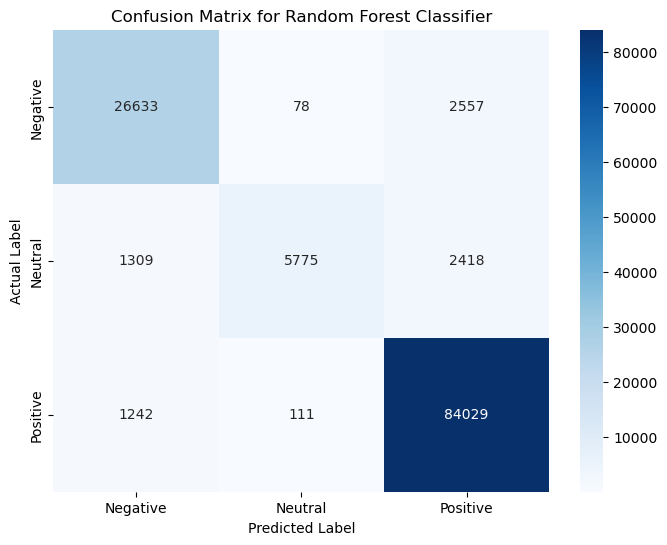

In [17]:
# Get predictions for Random Forest
rf_model = models["Random Forest"]
y_pred_rf = rf_model.predict(X_test_vectorized)

conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

## Step 10: Generate wordcloud

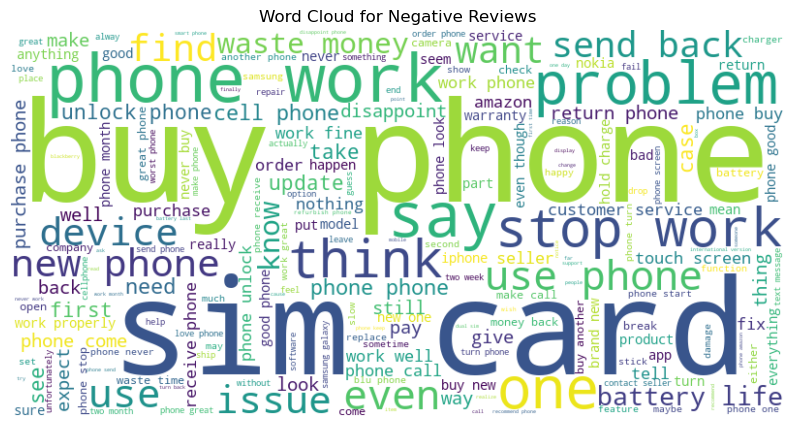

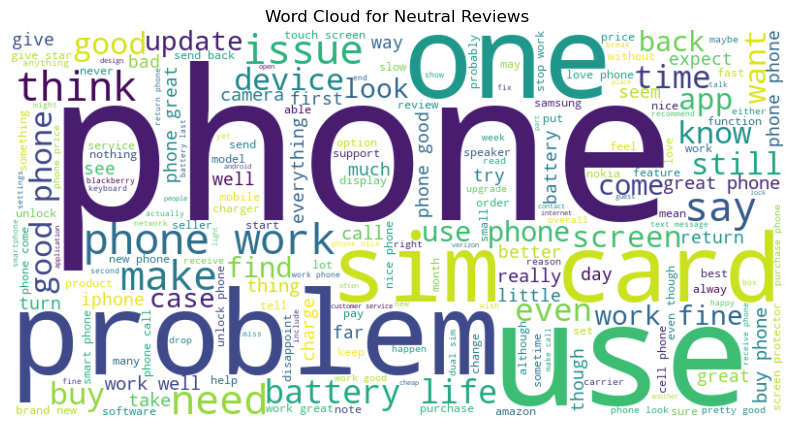

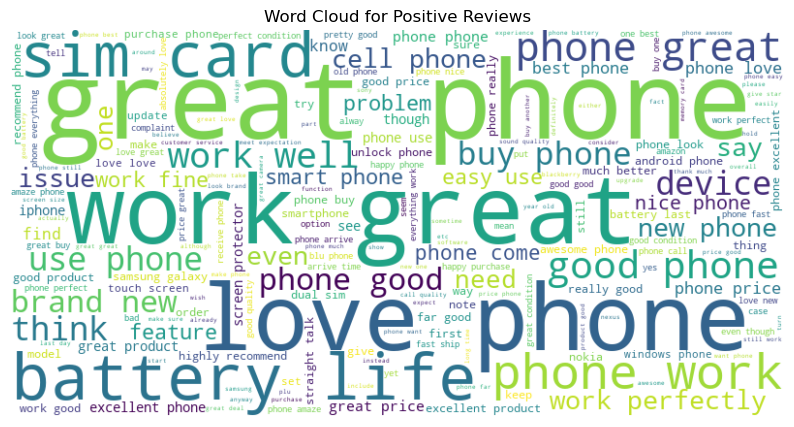

In [18]:
labels = y_test.unique()
for label in labels:
    # Filter reviews by label
    reviews_by_label = df[df['Label'] == label]['CleanReview']
    combined_reviews = " ".join(reviews_by_label)

    # Create the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(combined_reviews)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {label} Reviews')
    plt.show()